# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling. 

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset

import wrangle

In [2]:
train, validate, test = wrangle.wrangle_telco()

In [3]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1540,9084-OAYKL,20.80,58,1212.25
1187,7036-TYDEC,104.00,69,7028.50
1106,6625-FLENO,20.75,58,1185.95
909,5485-ITNPC,85.90,66,5595.30
1271,7569-NMZYQ,118.75,72,8672.45


In [4]:
# # 1. Apply the scalers we talked about in this lesson to your data and visualize the 
# # results in a way you find helpful.

# # 1. create the object
# scaler = sklearn.preprocessing.MinMaxScaler()
# # 2. fit the object
# scaler.fit(train[['total_charges']])
# # 3. use the object
# train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
# test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
# validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

In [5]:
# # 1. continued
# plt.figure(figsize=(13, 6))
# plt.subplot(121)
# train.total_charges.plot.hist(title='Original')
# plt.subplot(122)
# train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

In [6]:
# scaler = sklearn.preprocessing.MinMaxScaler()

In [7]:
# scaler.fit(train[['monthly_charges']])

In [8]:
# train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
# validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
# test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

In [9]:
# # 1. continued
# plt.figure(figsize=(13, 6))
# plt.subplot(121)
# train.monthly_charges.plot.hist(title='Original')
# plt.subplot(122)
# train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [10]:
# scaler.fit(train[['tenure']])

In [11]:
# train['tenure_scaled'] = scaler.transform(train[['tenure']])
# validate['tenure_scaled'] = scaler.transform(validate[['tenure']])
# test['tenure_scaled'] = scaler.transform(test[['tenure']])

In [12]:
# 1. continued
# plt.figure(figsize=(13, 6))
# plt.subplot(121)
# train.tenure.plot.hist(title='Original')
# plt.subplot(122)
# train.tenure_scaled.plot.hist(title='Min-Max Scaled')

In [13]:
sstrain, ssvalidate, sstest = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.StandardScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

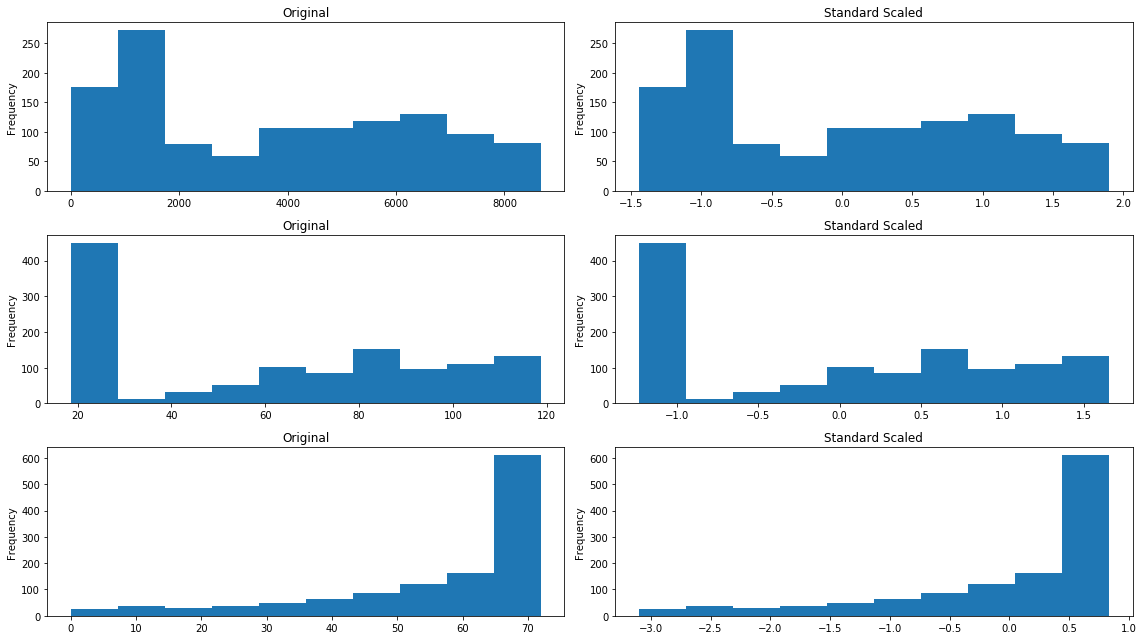

In [14]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
sstrain.total_charges.plot.hist(title='Original')
plt.subplot(322)
sstrain.total_charges_scaled.plot.hist(title='Standard Scaled')

plt.subplot(323)
sstrain.monthly_charges.plot.hist(title='Original')
plt.subplot(324)
sstrain.monthly_charges_scaled.plot.hist(title='Standard Scaled')

plt.subplot(325)
sstrain.tenure.plot.hist(title='Original')
plt.subplot(326)
sstrain.tenure_scaled.plot.hist(title='Standard Scaled')

plt.tight_layout()
plt.show()

In [15]:
mmtrain, mmvalidate, mmtest = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

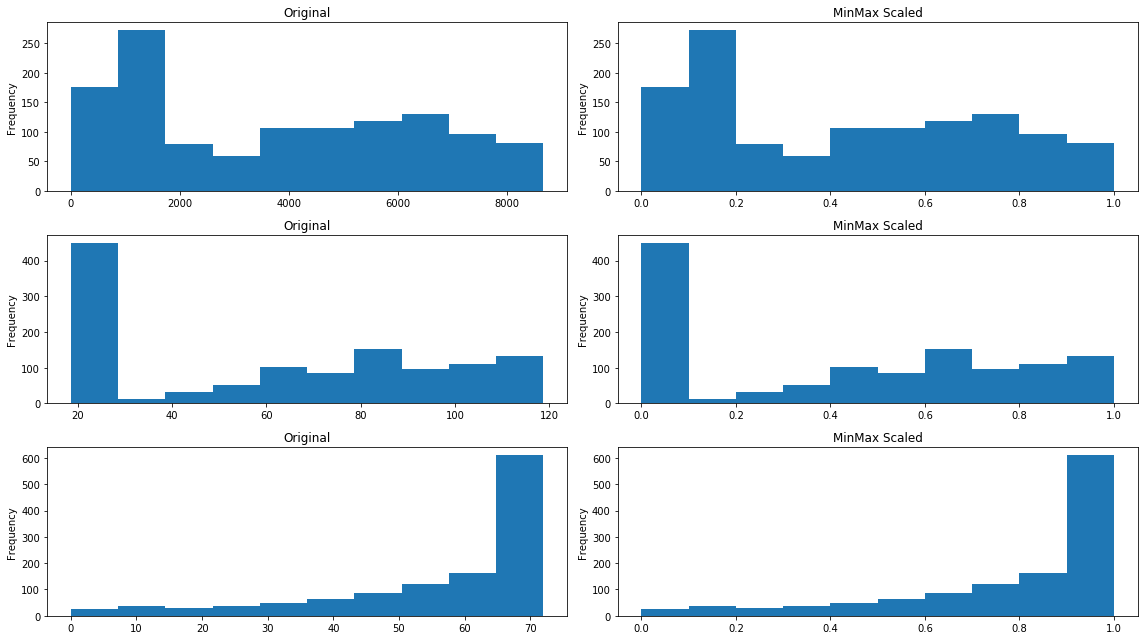

In [16]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
mmtrain.total_charges.plot.hist(title='Original')
plt.subplot(322)
mmtrain.total_charges_scaled.plot.hist(title='MinMax Scaled')

plt.subplot(323)
mmtrain.monthly_charges.plot.hist(title='Original')
plt.subplot(324)
mmtrain.monthly_charges_scaled.plot.hist(title='MinMax Scaled')

plt.subplot(325)
mmtrain.tenure.plot.hist(title='Original')
plt.subplot(326)
mmtrain.tenure_scaled.plot.hist(title='MinMax Scaled')

plt.tight_layout()
plt.show()

In [17]:
# 2. Apply the .inverse_transform method to your scaled data. 
# Is the resulting dataset the exact same as the original data?

scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(sstrain[['tenure']])

sstrain['tenure_inverse'] = scaler.inverse_transform(sstrain[['tenure_scaled']])
ssvalidate['tenure_inverse'] = scaler.inverse_transform(ssvalidate[['tenure_scaled']])
sstest['tenure_inverse'] = scaler.inverse_transform(sstest[['tenure_scaled']])

In [18]:
# inverse transform returns a float instead of int
sstrain.head()
sstrain.dtypes

customer_id                object
monthly_charges           float64
tenure                      int64
total_charges             float64
monthly_charges_scaled    float64
total_charges_scaled      float64
tenure_scaled             float64
tenure_inverse            float64
dtype: object

In [19]:
# 3. Read the documentation for sklearn's QuantileTransformer. 
# Use normal for the output_distribution and apply this scaler to your data.
# Visualize the result of your data scaling.

nl1train, nl1validate, nl1test = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

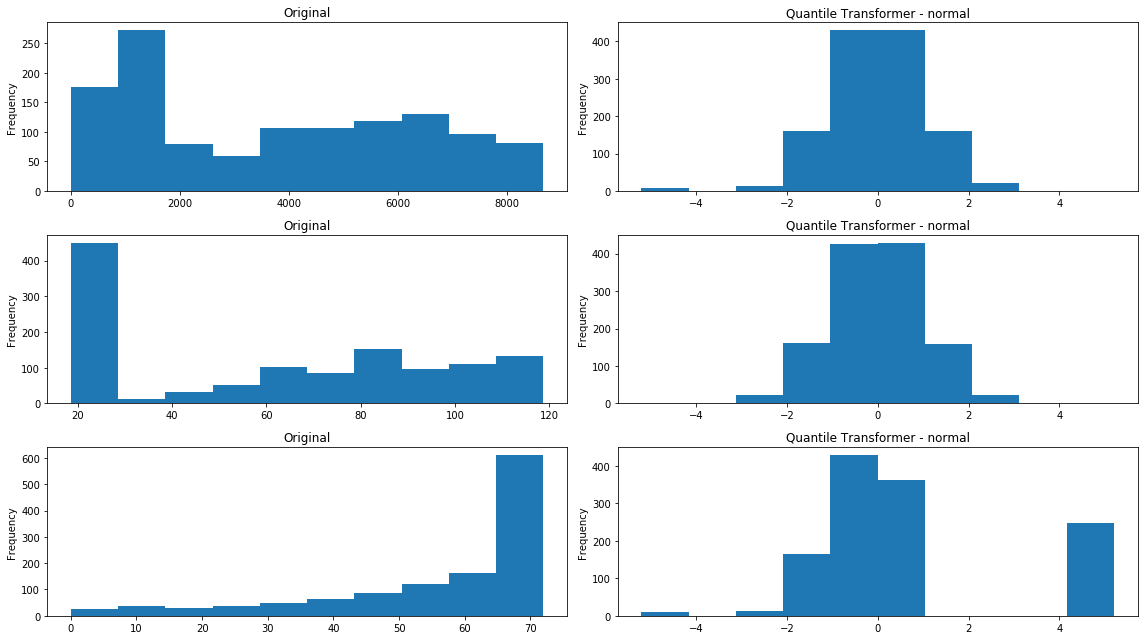

In [20]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
nl1train.total_charges.plot.hist(title='Original')
plt.subplot(322)
nl1train.total_charges_scaled.plot.hist(title='Quantile Transformer - normal')

plt.subplot(323)
nl1train.monthly_charges.plot.hist(title='Original')
plt.subplot(324)
nl1train.monthly_charges_scaled.plot.hist(title='Quantile Transformer - normal')

plt.subplot(325)
nl1train.tenure.plot.hist(title='Original')
plt.subplot(326)
nl1train.tenure_scaled.plot.hist(title='Quantile Transformer - normal')

plt.tight_layout()
plt.show()

In [21]:
# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. 
# What do you notice?

nl2train, nl2validate, nl2test = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.QuantileTransformer(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

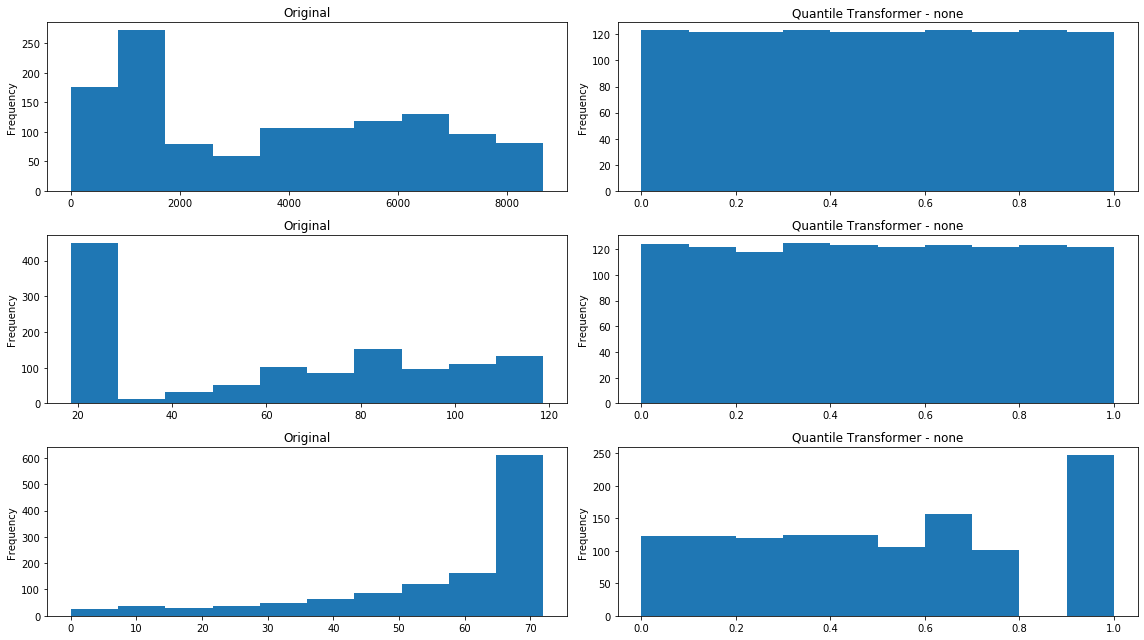

In [28]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
nl2train.total_charges.plot.hist(title='Original')
plt.subplot(322)
nl2train.total_charges_scaled.plot.hist(title='Quantile Transformer - none')

plt.subplot(323)
nl2train.monthly_charges.plot.hist(title='Original')
plt.subplot(324)
nl2train.monthly_charges_scaled.plot.hist(title='Quantile Transformer - none')

plt.subplot(325)
nl2train.tenure.plot.hist(title='Original')
plt.subplot(326)
nl2train.tenure_scaled.plot.hist(title='Quantile Transformer - none')

plt.tight_layout()
plt.show()

In [23]:
# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. 
# What do you notice?

nl3train, nl3validate, nl3test = wrangle.add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.QuantileTransformer(output_distribution='uniform'),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
)

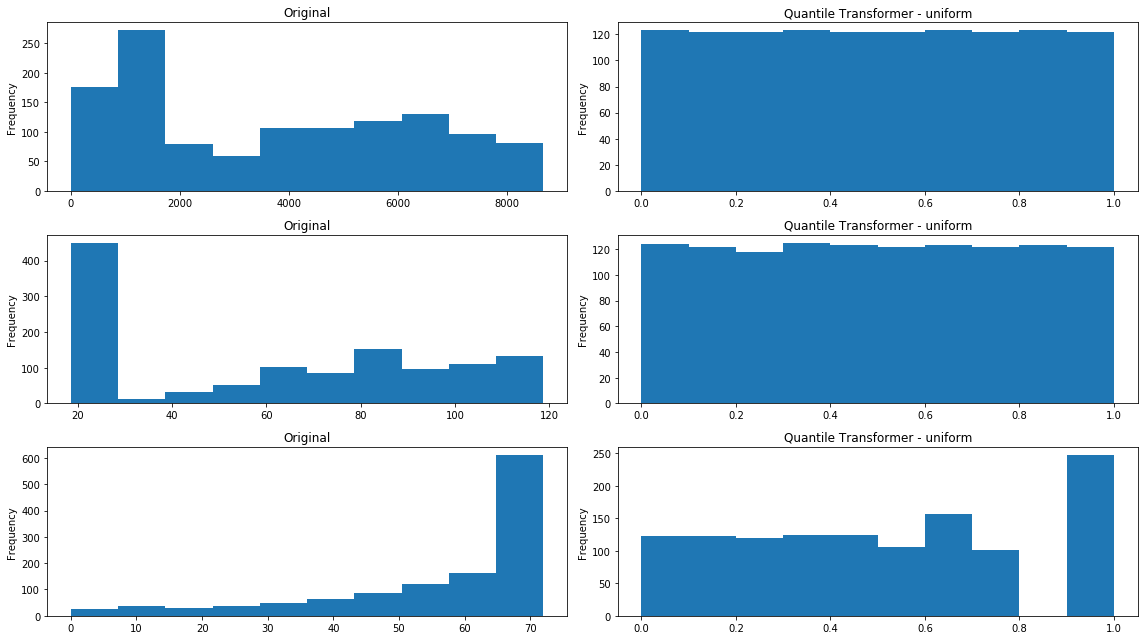

In [29]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
nl3train.total_charges.plot.hist(title='Original')
plt.subplot(322)
nl3train.total_charges_scaled.plot.hist(title='Quantile Transformer - uniform')

plt.subplot(323)
nl3train.monthly_charges.plot.hist(title='Original')
plt.subplot(324)
nl3train.monthly_charges_scaled.plot.hist(title='Quantile Transformer - uniform')

plt.subplot(325)
nl3train.tenure.plot.hist(title='Original')
plt.subplot(326)
nl3train.tenure_scaled.plot.hist(title='Quantile Transformer - uniform')

plt.tight_layout()
plt.show()

In [25]:
# 5. Based on the work you've done, choose a scaling method for your dataset. 
# Write a function within your prepare.py that accepts as input the train, validate, and test data splits, 
# and returns the scaled versions of each. 
# Be sure to only learn the parameters for scaling from your training data!

# based on other categorical data in this dataset that we are not using currently I would use the MinMaxScaler
# function is in wrangle.py file

In [26]:
itrain, ivalidate, itest = wrangle.inverse_scaled_columns(
    mmtrain,
    mmvalidate,
    mmtest,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
    columns_to_inverse=['monthly_charges_scaled', 'total_charges_scaled', 'tenure_scaled'],
)

In [27]:
itrain.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled,monthly_charges_scaled_inverse,total_charges_scaled_inverse,tenure_scaled_inverse
1540,9084-OAYKL,20.80,58,1212.25,0.022455,0.139782,0.805556,20.80,1212.25,58.0
1187,7036-TYDEC,104.00,69,7028.50,0.852794,0.810440,0.958333,104.00,7028.50,69.0
1106,6625-FLENO,20.75,58,1185.95,0.021956,0.136749,0.805556,20.75,1185.95,58.0
909,5485-ITNPC,85.90,66,5595.30,0.672156,0.645181,0.916667,85.90,5595.30,66.0
1271,7569-NMZYQ,118.75,72,8672.45,1.000000,1.000000,1.000000,118.75,8672.45,72.0
